# **Market Basket Analysis - Exercício 1**

---

<a href="https://midoritoyota.netlify.app/" target="_blank"><img align="left" src="./images/portfolio.png" title="See my portfolio!"/></a><img align="left" src="./images/espaco.png"/>

<a href="mailto:midori.toyota@gmail.com" target="_blank"><img align="left" src="./images/gmail.png" title="Contact me!"/></a><img align="left" src="./images/espaco.png"/>

<a href="https://www.linkedin.com/in/midoritoyota/" target="_blank"> <img align="left" src="./images/linkedin.png" title="Add me on linkedin!" /></a><img align="left" src="./images/espaco.png"/>

<a href="https://github.com/MidoriToyota" target="_blank"> <img align="left" src="./images/github.png" title="Follow me on github!"/></a>

<br/><br/>


Para fazer o projeto de conclusão de curso de Business Analytics da **Data Science Academy (DSA)** preciso entender como funciona o pacote APRIORI para fazer recomendações de compras para uma base de clientes. Para isso, encontrei 2 artigos com o passo a passo da utilização do algorítimo. Nesse primeiro exercício vou reproduzir o problema resolvido por **Rizka Yolanda** no seguinte artigo:

https://medium.com/@yolandawiyono98/market-basket-analysis-with-r-8001417a8e29

O artigo do **Jie Wang** foi base para compreensão dos objetos da classe transaction:

https://www.jdatalab.com/data_science_and_data_mining/2018/10/10/association-rule-transactions-class.html

## **Pacotes**

Utilizarei o pacole arules, que cria as regras segundo o algorítimo APRIORI, o pacote arulesViz, que permite a visualização de objetos da classe transaction e o dataset Groceries, que já está no formato transaction e vem com o pacote arules.

In [9]:
# Carregando os pacotes
library(arules)
library(arulesViz)
library(datasets)
library(ggplot2)
library(repr)
 
# Carregando o dataset do exemplo
data(Groceries)

## **Análise exploratória** 

### **Entendendo dados da classe transaction**

Como explicado no artigo do Jie Wang abaixo. O pacote APRIORI lê um tipo diferente de arquivo. O arquivo é da classe *transactions*, e não dá para visualizar com head, pois não é um dataframe, nem uma lista. O arquivo se assemelha à uma lista de dataframes.

**Comando inspect**

O comando `inspect` pertence ao pacote arulesViz e é uma forma de visualizar o conteúdo de um objeto da classe transaction. Abaixo, vemos a aplicação do comando `inspect`, que mostra um índice identificador da ordem de compra e dentro de cada ordem de compra há uma lista de itens comprados, como se fossem os itens de um cupom fiscal.

In [2]:
# Ver o conteúdo do dataset Groceries, objeto da classe "Transactions"
inspect(head(Groceries, 3))

    items                
[1] {citrus fruit,       
     semi-finished bread,
     margarine,          
     ready soups}        
[2] {tropical fruit,     
     yogurt,             
     coffee}             
[3] {whole milk}         


**Estrutura da classe transaction**

Como explicado por Jie Wang, o objeto da classe transaction é dividido em 3 componentes `@data`, `@itemInfo` e `@itemsetInfo`:

- O `@itemsetInfo` é uma dataframe vazio que só será preenchido quando rodarmos a função apriori
- O `@itemInfo` é um dataframe com 3 colunas: labels (que tem o nome de cada produto), level1 (que mostra um tipo de categorização dos produtos) e level2 (que mostra um tipo de subcategorização dos produtos)
- O `@data` é uma matriz que contém 2 listas: Groceries@data@i (lista completa dos itens comprados do primeiro ao último cliente) e Groceries@data@p (lista com os índices que dividem uma compra de outra).

In [3]:
# Estrutura do dataset
str(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [5]:
# Conteúdo do @itemInfo
Groceries@itemInfo$labels[1:5]
Groceries@itemInfo$level1[1:5]
Groceries@itemInfo$level2[1:5]

[1] "frankfurter" "sausage"     "liver loaf"  "ham"         "meat"

[1] meat and sausage meat and sausage meat and sausage meat and sausage
[5] meat and sausage
10 Levels: canned food detergent drinks fresh products ... snacks and candies

[1] sausage sausage sausage sausage sausage
55 Levels: baby food bags bakery improver bathroom cleaner beef ... wine

In [6]:
# Conteúdo das listas do Groceries@data
head(Groceries@data@i,5)
head(Groceries@data@p,5)

[1] 13 60 69 78 14

[1]  0  4  7  8 12

## **Interpretando resultados do da função `apriori`**

### **Frequência de compra dos itens**


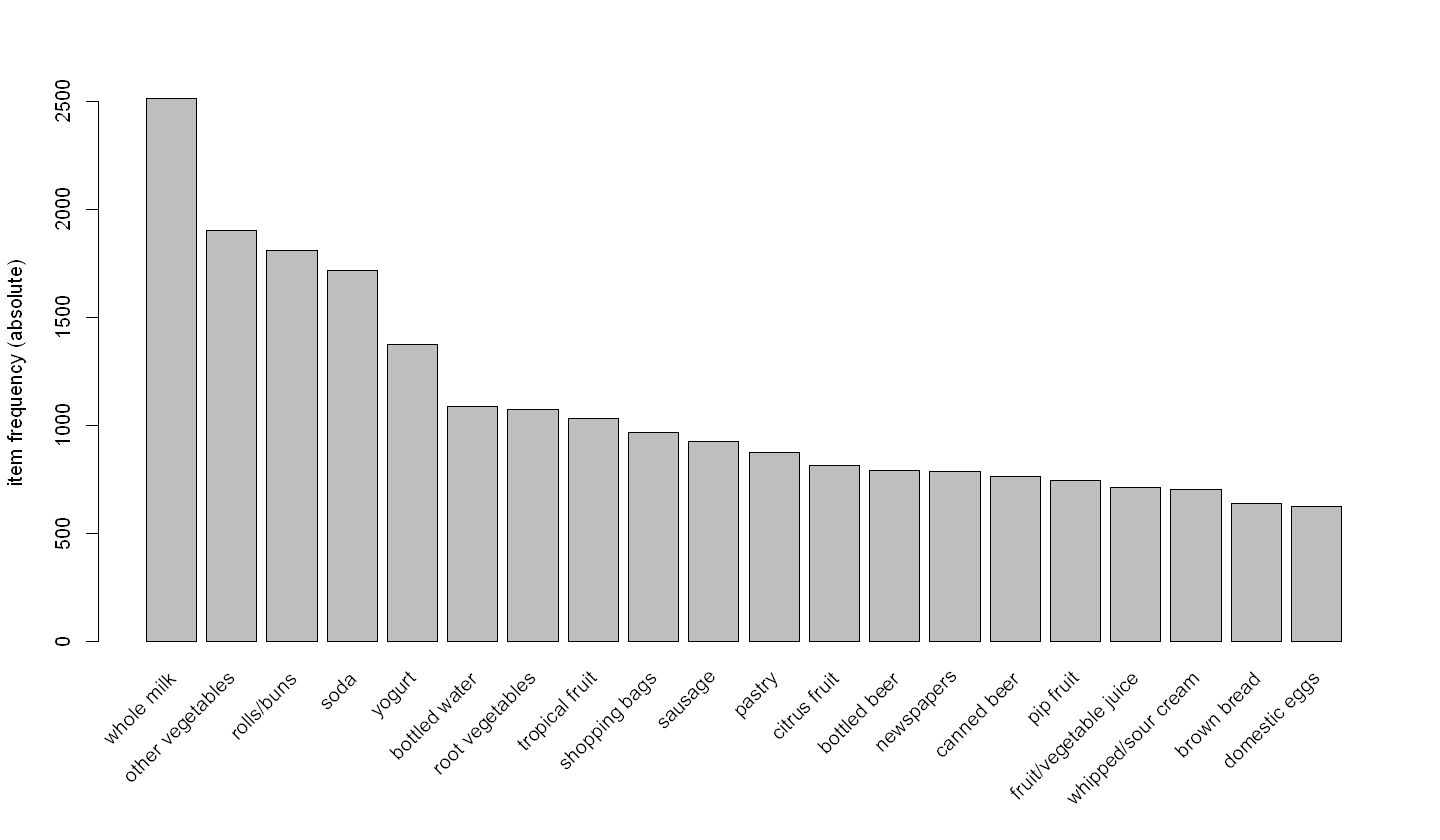

In [10]:
# Plot dos 20 itens mais frequentes (função do pacote arules)
options(repr.plot.width=12, repr.plot.height=7)
itemFrequencyPlot(Groceries,topN=20,type="absolute")

### **Aplicação básica do `apriori`**

Resumo dos parâmetros:

- `Support` (supp): é a porcentagem mínima que um item aparece na lista de compras, para ser considerado uma regra.
- `Confidence` (conf): é a porcentagem mínima que um item aparece junto com outro item, para ser considerado uma regra.


In [11]:
# Definindo principais regras
rules = apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.03s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [410 rule(s)] done [0.01s].
creating S4 object  ... done [0.00s].


In [12]:
 # Mostrar as 5 primeiras regras
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


Observando o item 1, por exemplo, temos que 90% (`confidence` = 0.90) das pessoas que compram liquor ou vinho provavelmente irão comprar cerveja também. e temos que aproximadamente 0,19% (`support` = 0.0019) das compras contém liquor ou vinho.

Com o comando `summary` vemos que foram geradas 410 regras. A maior parte são regras de 4 itens.

In [13]:
# Resumo das regras
summary(rules)

set of 410 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 29 229 140  12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     4.0     4.0     4.3     5.0     6.0 

summary of quality measures:
    support          confidence      coverage           lift     
 Min.   :0.00102   Min.   :0.80   Min.   :0.0010   Min.   : 3.1  
 1st Qu.:0.00102   1st Qu.:0.83   1st Qu.:0.0012   1st Qu.: 3.3  
 Median :0.00122   Median :0.85   Median :0.0013   Median : 3.6  
 Mean   :0.00125   Mean   :0.87   Mean   :0.0014   Mean   : 4.0  
 3rd Qu.:0.00132   3rd Qu.:0.91   3rd Qu.:0.0016   3rd Qu.: 4.3  
 Max.   :0.00315   Max.   :1.00   Max.   :0.0036   Max.   :11.2  
     count     
 Min.   :10.0  
 1st Qu.:10.0  
 Median :12.0  
 Mean   :12.3  
 3rd Qu.:13.0  
 Max.   :31.0  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.001        0.8

### **Ordenação dos resultados por ordem de relevância**

Os resultados acima não estavam ordenados, vamos ordenar por ordem de `confidence`.

In [14]:
# 5 primeiras regras em ordem de relevância
rules = sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

### **Remoção de regras longas**

Para não criarmos regras muito longas, podemos limitar `maxlen`, ou colocar um valor mínimo com `minlen`.

In [15]:
# Permitir apenas regras de até 3 itens
rules = apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8,maxlen=3))
rules = sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8, :
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                         rhs          support confidence coverage lift count
[1] {rice,                                                                         
     sugar}                  => {whole milk}  0.0012       1.00   0.0012  3.9    12
[2] {canned fish,                                                                  
     hygiene articles}       => {whole milk}  0.0011       1.00   0.0011  3.9    11
[3] {whipped/sour cream,                                                           
     house keeping products} => {whole milk}  0.0012       0.92   0.0013  3.6    12
[4] {rice,                                                                         
     bottled water}          => {whole milk}  0.0012       0.92   0.0013  3.6    12
[5] {soups,                                                                        
     bottled beer}           => {whole milk}  0.0011       0.92   0.

### **Eliminação de regras redundantes**

In [16]:
subset.matrix = is.subset(rules, rules)
subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA
redundant = colSums(subset.matrix, na.rm=T) >= 1
rules.pruned = rules[!redundant]
rules = rules.pruned

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."


## **Fazendo recomendações**

Há duas perguntas importantes a serem respondidas:

- Pergunta nº 1 - O que os cientes costumam compram antes de comprar whole milk?
- Pergunta nº 2 - O que os clientes costumam comprar se eles compram whole milk?

### **Resposta da pergunta nº 1**?

O que os cientes costumam compram antes de comprar whole milk?

Para responder a essa pergunta basta utilizar a função `apriori` com os parametros do item que estamos procurando. Queremos congelar o item `rhs` e manter o `lhs` padrão (veja o nome das colunas da tabela abaixo). Para responder a segunda pergunta faremos o oposto.


In [17]:
rules = apriori(data=Groceries, parameter=list(supp=0.005,conf = 0.5), 
                appearance = list(default="lhs",rhs="whole milk"),
                control = list(verbose=F))
rules = sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {tropical fruit,                                                           
     root vegetables,                                                          
     yogurt}             => {whole milk}  0.0057       0.70   0.0081  2.7    56
[2] {pip fruit,                                                                
     root vegetables,                                                          
     other vegetables}   => {whole milk}  0.0055       0.68   0.0081  2.6    54
[3] {butter,                                                                   
     whipped/sour cream} => {whole milk}  0.0067       0.66   0.0102  2.6    66
[4] {pip fruit,                                                                
     whipped/sour cream} => {whole milk}  0.0060       0.65   0.0093  2.5    59
[5] {butter,                                                                   
     yogurt}             => {whole milk}

### **Resposta da pergunta nº 2**

O que os clientes costumam comprar se eles compram whole milk?

In [18]:
rules = apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2), 
                appearance = list(default="rhs",lhs="whole milk"),
                control = list(verbose=F))
rules = sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


## **Visualização**

Tive alguns problemas para visualizar o mesmo gráfico que o criado por Rizka Yolanda. O item `interactive` já não existe, e o erro recomenda usar `engine` = "interactive", mas ainda assim dá problema **Error in structure(.External(.C_dotTclObjv, objv), class = "tclObj"): [tcl] invalid command name "font"**. 

A solução encontrad na internet foi de atualizar o pacote mas como esse pacote já vem com o google colab, não é possível atulizá-lo como mostra o warning abaixo:

In [19]:
install.packages("tcltk")

Installing package into 'C:/Users/Kamila Midori Toyota/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'tcltk' is not available (for R version 3.6.3)"
Warning message:
"package 'tcltk' is a base package, and should not be updated"


Não consegui fazer justamento o plot `engine` = `interactive`. Mas consegui outros plots

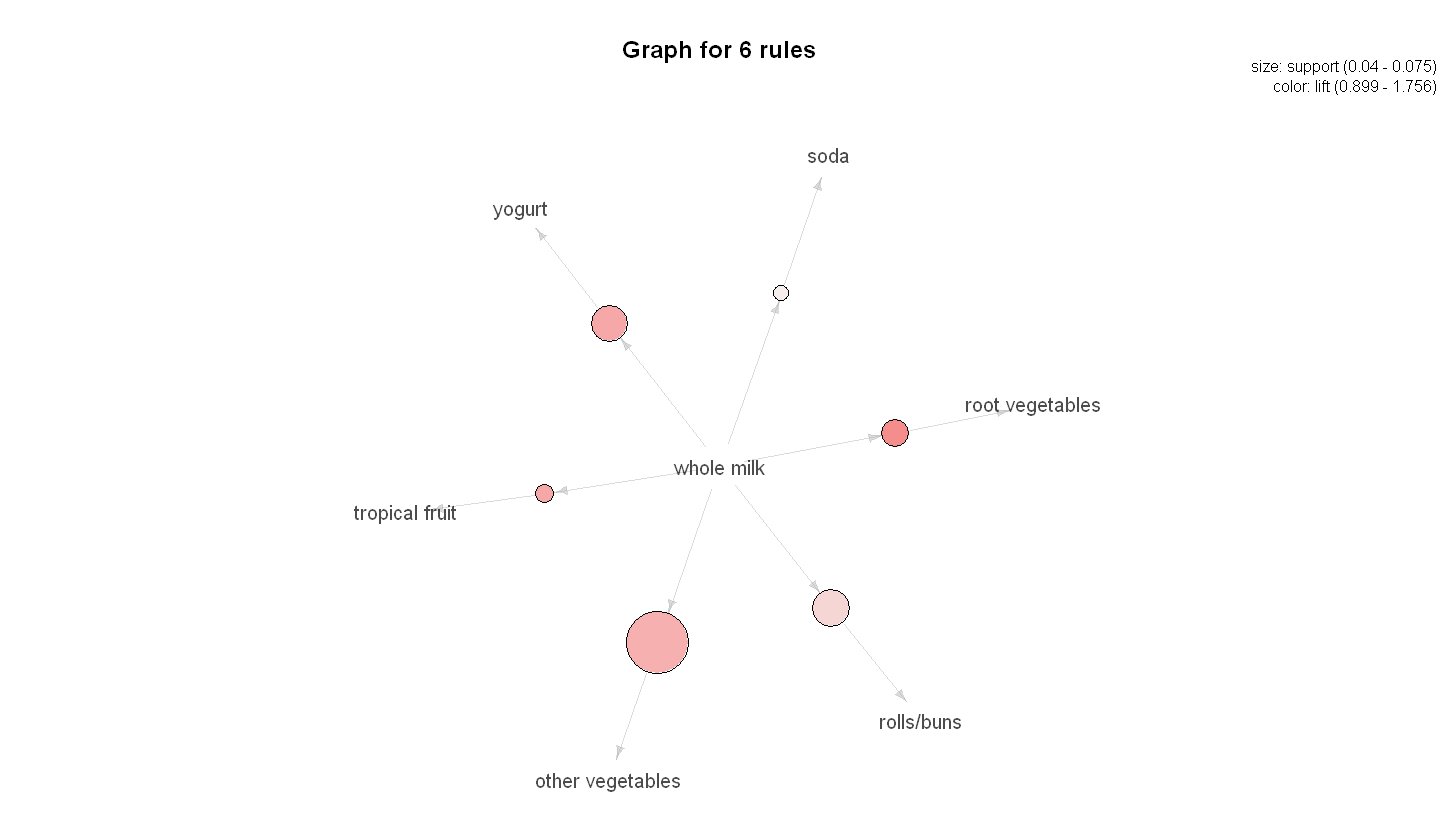

In [35]:
# Plot default
plot(rules, method="graph", engine = "default")

Loading required namespace: Rgraphviz



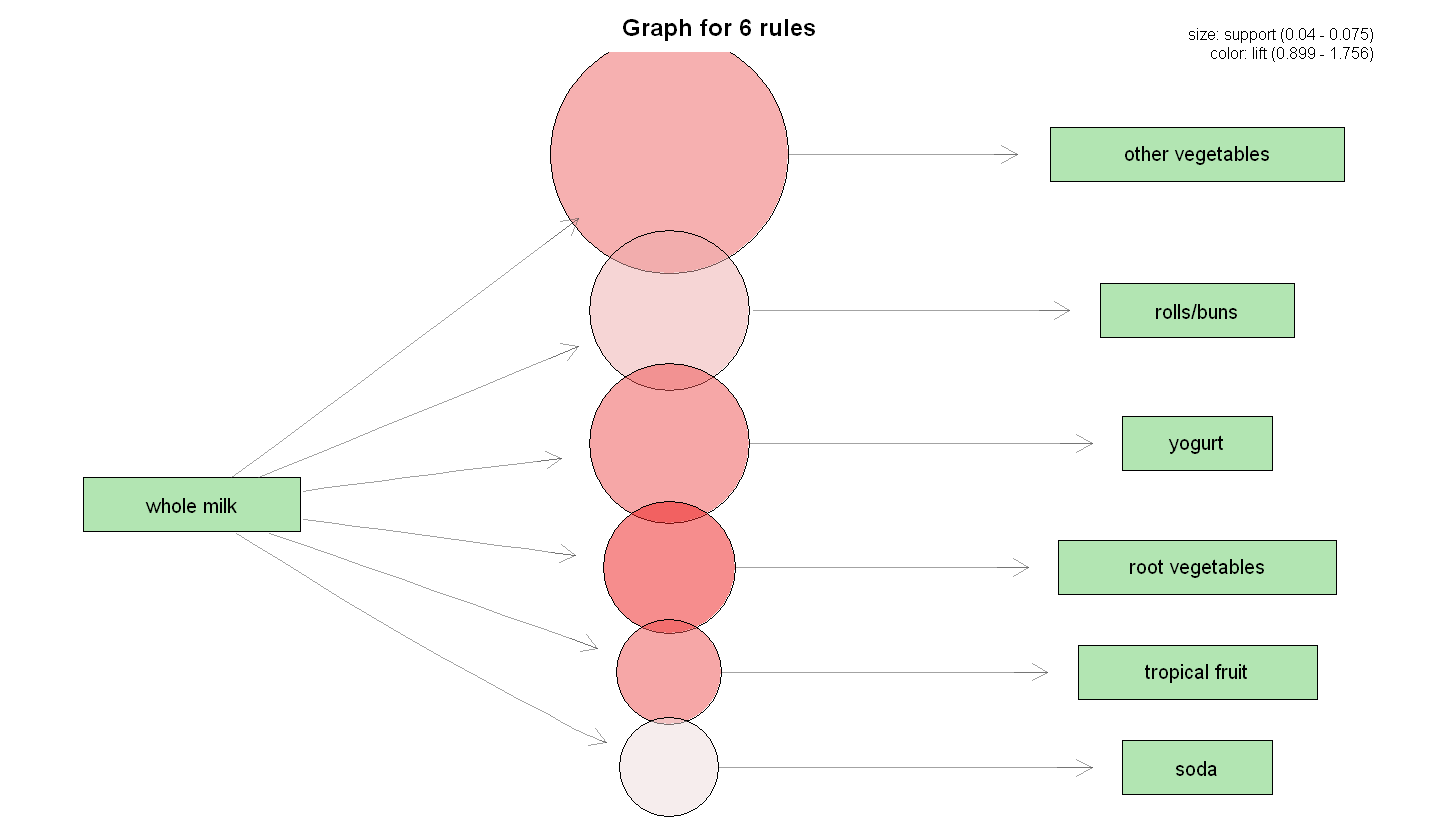

In [30]:
# Plot com Engine Graphviz
plot(rules, method="graph", engine = "graphviz")

---

<a href="https://midoritoyota.netlify.app/" target="_blank"><img align="left" src="./images/portfolio.png" title="See my portfolio!"/></a><img align="left" src="./images/espaco.png"/>

<a href="mailto:midori.toyota@gmail.com" target="_blank"><img align="left" src="./images/gmail.png" title="Contact me!"/></a><img align="left" src="./images/espaco.png"/>

<a href="https://www.linkedin.com/in/midoritoyota/" target="_blank"> <img align="left" src="./images/linkedin.png" title="Add me on linkedin!" /></a><img align="left" src="./images/espaco.png"/>

<a href="https://github.com/MidoriToyota" target="_blank"> <img align="left" src="./images/github.png" title="Follow me on github!"/></a>

<br/><br/>
